In [5]:
# Cargar librerias
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedKFold
# librerías Árboles de Decisión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer

In [7]:
# No tiene siquiera la cabecera, entonces toca introducirle una
nombres = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','earnings']
adultos = pd.read_csv('adult.data', names=nombres)
adultos

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
# Se crea una copia de adultos
adultosCambio = adultos.copy()
# Se eliminan las filas con algún valor vacío, si es que hay.
adultosCambio = adultosCambio.dropna()
# Vamos a cambiar los valores a labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Se borra el '?'
adultosCambio.drop(adultosCambio[adultosCambio['workclass'] == ' ?'].index, inplace = True)


adultosCambio['workclass'] = le.fit_transform(adultosCambio['workclass'])
# Work class:
# 6: State-gov,   5: Self-emp-not-inc, 3: Private, 0: Federal-gov, 1. Local-gov, 4: Self-emp-inc, 7: Without-pay, 2: Never-worked
adultosCambio['workclass'] = np.where((adultosCambio['workclass'] == 6), 0, adultosCambio['workclass'])
adultosCambio['workclass'] = np.where((adultosCambio['workclass'] == 1), 0, adultosCambio['workclass'])
adultosCambio['workclass'] = np.where((adultosCambio['workclass'] == 5), 1, adultosCambio['workclass'])
adultosCambio['workclass'] = np.where((adultosCambio['workclass'] == 3), 1, adultosCambio['workclass'])
adultosCambio['workclass'] = np.where((adultosCambio['workclass'] == 4), 1, adultosCambio['workclass'])
adultosCambio['workclass'] = np.where((adultosCambio['workclass'] == 7), 2, adultosCambio['workclass'])
# Arriba se dividieron en 3 secciones en vez de 2
# fnlwgt no tiene mucho sentido, entonces probablemente no se use.
adultosCambio = adultosCambio.drop(['fnlwgt'],axis = 1)
# Ahora el label a educacion

adultosCambio['education'] = le.fit_transform(adultosCambio['education'])
# 9: Bachelors, 11: High schoolgraduate, 1: 11th, 12: Masters, 6: 9th, 15: Some-college, 7: Assoc-acdm, 8: Assoc-voc, 5: 7th,
# 10: doctorado, 14: Prof-shcool, 4: 5th, 10th: 0, preschool: 13, 2: 12th, 1sth-4th:3
# Educación basica (0):
for elemento in [11,1,6,5,4,13,2,3]:
    adultosCambio['education'] = np.where((adultosCambio['education'] == elemento), 0, adultosCambio['education'])
# Certificaciones básicas (1):
for elemento in [9,15,7,8,14]:
    adultosCambio['education'] = np.where((adultosCambio['education'] == elemento), 1, adultosCambio['education'])
# Certificaciones avanzadas (2):
for elemento in [12,10]:
    adultosCambio['education'] = np.where((adultosCambio['education'] == elemento), 2, adultosCambio['education'])
    

# education-num ya no será necesario, también se borrará
adultosCambio = adultosCambio.drop(['education-num'],axis = 1)
# Borrar occupation, ya se tiene el workclass
adultosCambio = adultosCambio.drop(['occupation'],axis = 1)
# Hacer lo mismo con marital-status, occupation, relationship, race, sex, native-country, earnings.
# Borrar los '?' de native-country
adultosCambio.drop(adultosCambio[adultosCambio['native-country'] == ' ?'].index, inplace = True)
for elemento in ['marital-status','relationship','race','sex','native-country']:
    adultosCambio[elemento] = le.fit_transform(adultosCambio[elemento])
# Se elimina marital-status al ser similar a relationship
adultosCambio = adultosCambio.drop(['marital-status'],axis = 1)
# Falta por cambiar:  relationship , native-country (país de primer mundo y país de tercer mundo)
# relation-ship
# En vez de husband-wife, poner esos dos en el mismo grupo
adultosCambio['relationship'] = np.where((adultosCambio['relationship'] == 5), 0, adultosCambio['relationship'])
# Cambiar native-country
# [' United-States: 38', ' Cuba: 4', ' Jamaica: 22', ' India: 18', ' Mexico: 25', ' Puerto-Rico: 32',
#' Honduras: 15', ' England: 8', ' Canada: 1', ' Germany: 10', ' Iran: 19', ' Philippines: 29', 
#' Poland: 30', ' Columbia: 3', ' Cambodia: 0', ' Thailand: 36', ' Ecuador: 6', ' Laos: 24'
#, ' Taiwan: 35', ' Haiti: 13', ' Portugal: 31', ' Dominican-Republic: 5', ' El-Salvador: 7', ' France: 9'
#, ' Guatemala: 12', ' Italy: 21', ' China: 2', ' South: 34', ' Japan: 23', ' Yugoslavia: 40', ' Peru: 28'
#, ' Outlying-US(Guam-USVI-etc): 27', ' Scotland: 33', ' Trinadad&Tobago: 37', ' Greece: 11', ' Nicaragua: 26'
#, ' Vietnam: 39', ' Hong: 16', ' Ireland: 20', ' Hungary: 17', ' Holand-Netherlands: 14']
# Países primer mundo (1):
for elemento in [38,8,10,30,35,31,9,21,2,34,23,33,16,17,14]:
    adultosCambio['native-country'] = np.where((adultosCambio['native-country'] == elemento), 1, adultosCambio['native-country'])
# Países en desarrollo (0):
adultosCambio['native-country'] = np.where((adultosCambio['native-country'] != 1), 0, adultosCambio['native-country'])
# El último va a ser earnings, el cual luego le haremos inverse transform para entender el resultado que arrojarán los experimentos
la = preprocessing.LabelEncoder()
la.fit(adultosCambio['earnings'])
adultosCambio['earnings'] = la.fit_transform(adultosCambio['earnings'])
# Categorias de edad (para evitar cada edad individual)
# 0 (Adulto joven): 17 a 39
# 1 (Adulto): 40 a 59
# 2 (Baby boomer): 60 para adelante
for minimo,maximo,label in zip([17,40,60],[39,59,90],[0,1,2]):
    adultosCambio['age'] = np.where((adultosCambio['age'] >=minimo) & (adultosCambio['age'] <= maximo) , label, adultosCambio['age'])
adultosCambio



,age,workclass,education,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earnings
0,0,0,1,1,4,1,2174,0,40,1,0
1,1,1,1,0,4,1,0,0,13,1,0
2,0,1,0,1,4,1,0,0,40,1,0
3,1,1,0,0,2,1,0,0,40,1,0
4,0,1,1,0,2,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,0,1,1,0,4,0,0,0,38,1,0
32557,1,1,0,0,4,1,0,0,40,1,1
32558,1,1,0,4,4,0,0,0,40,1,0
32559,0,1,0,3,4,1,0,0,20,1,0


<p> Lo que se va a realizar es analizar la distribución de capital-loss y capital-gain, para determinar si se debe de crear categorias de estos dos </p>

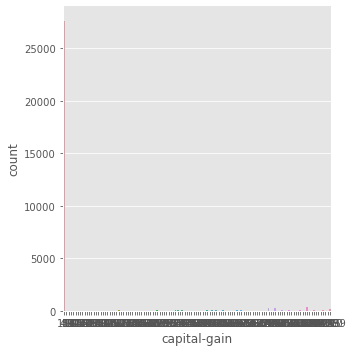

In [9]:
CG = sb.catplot(x = 'capital-gain',data = adultosCambio, kind = 'count')
CG

<p>Se puede notar que la distribución es totalmente desigual, lo que nos genera una pregunta, ¿qué se debería de hacer con estos datos? Lo que se va a hacer es categorizar entre: 0: no tiene capital entrante, 1: tiene algún tipo de capital entrante</p>

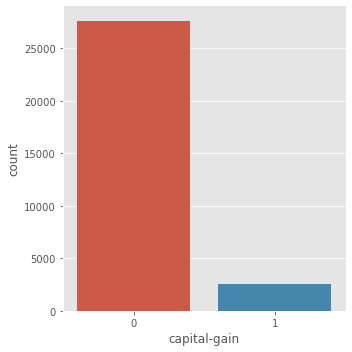

In [10]:
adultosCambio['capital-gain'] = np.where((adultosCambio['capital-gain'] != 0), 1, adultosCambio['capital-gain'])
CG = sb.catplot(x = 'capital-gain',data = adultosCambio, kind = 'count')
CG

<p> Aunque la distribución siga muy desigual se demuestra un cambio demasiado alto en la distribución de los datos </p>

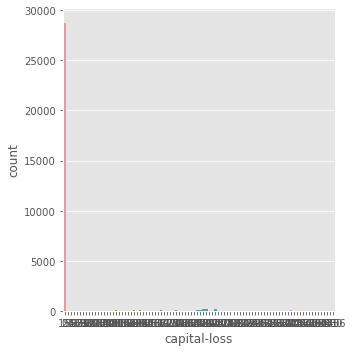

In [11]:
CL =  sb.catplot(x = 'capital-loss',data = adultosCambio, kind = 'count')
CL 

<p> Sucede lo mismo que con cappital-gain, la distribución de los datos es demasiado desigual, entonces se clasificará de la misma manera </p>

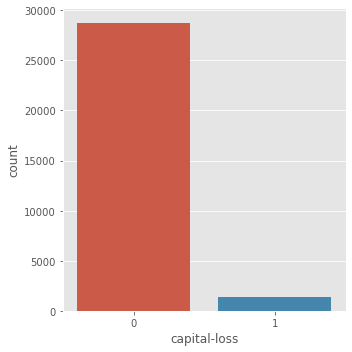

In [12]:
adultosCambio['capital-loss'] = np.where((adultosCambio['capital-loss'] != 0), 1, adultosCambio['capital-loss'])
CL =  sb.catplot(x = 'capital-loss',data = adultosCambio, kind = 'count')
CL 

<p> Aunque la distribución siga muy desigual se demuestra un cambio demasiado alto en la distribución de los datos </p>

<p> Vamos a verificar si es necesario hacer algún tipo de clasificación para la cantidad de horas trabajadas por semana </p>

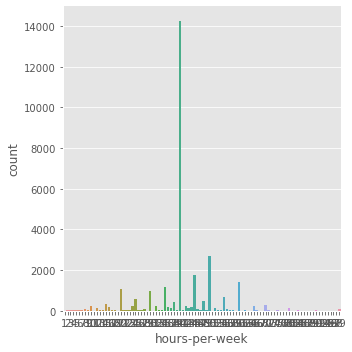

In [13]:
hours = sb.catplot(x = 'hours-per-week',data = adultosCambio, kind = 'count')
hours 

<p> La mayoría de datos se encuentra en 40, entonces se hará una división: 0 ilustrará a los datos menores de 40 horas, 40 quedará como 1 y 2 será para los datos mayores a 40 </p>

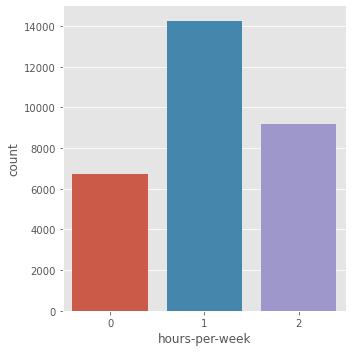

In [14]:
adultosCambio['hours-per-week'] = np.where((adultosCambio['hours-per-week'] < 40), 0, adultosCambio['hours-per-week'])
adultosCambio['hours-per-week'] = np.where((adultosCambio['hours-per-week'] == 40), 1, adultosCambio['hours-per-week'])
adultosCambio['hours-per-week'] = np.where((adultosCambio['hours-per-week'] > 40), 2, adultosCambio['hours-per-week'])
hours = sb.catplot(x = 'hours-per-week',data = adultosCambio, kind = 'count')
hours 

<p> La distribución de los datos cambió notablemente </p>

# 1. Descripción de los datos


<ul>
  <li>Age: Se refiere a la edad del individuo.</li>
  <li>Workclass: Al tipo de empleado que es, no su profesión como tal.</li>
  <li>Education: La educación que tiene el individuo.</li>
  <li>Marital-Status: Estado civil</li>
  <li>Occupation: El cargo (trabajo) que ocupa la persona.</li>
  <li>Relationship: Si posee esposa, hijos, separado, etc.</li>
  <li>Race: La etnia.</li>
  <li>Sexo: El sexo de la persona</li>
  <li>Capital-gain: Las ganancias.</li>
  <li>Capital-loss: El capital obtenido</li>
  <li>Hours-per-week: Las horas que trabaja por semana.</li>
  <li>Native-Country: El país de nacimiento</li>
  <li>Earnings: Si las ganancias anuales son mayores de 50.000 dolares o no.</li>
</ul>

# Pre-Procesamiento

<ol>
    <li>Eliminación de toda fila que contenta valores nulos.</li>
    <li>Eliminación de la columna Marital-Status, ya que relationship ya explica esto.</li>
    <li>Cambio de valores string a valores continuos que representen dicho valor, es decir, el uso de labels.</li>
    <li>También se eliminaron las columnas fnlwgt y education-num, ya que education y worclass ya representaban estos valores, no eran necesarios. </li>
    <li> Tambien se modificaron algunos valores (age, workclass, education,relationship, capital-loss, capital-gain, native-country y hours-per-week) a etiquetas más generales. El proceso en cuestión se encuentra en los comentarios del código. </li>
</ol>

<p> Para la modificación de valores: </p>

<ol>
    <li>Age: Las etiquetas son de adulto joven: 17 a 39 (0), adulto: 40 a 59(1) y Baby boomer: 60 para adelante(2)</li>
    <li>Workclass: Trabajadores de Estado (0), trabajadores privadores (1), no trabajan (2).</li>
    <li>Education: Educación básica (0), algún tipo de certificación (1), educación avanzada (2).</li>
    <li>Relationship: El único cambio fue agrupar husband con wife.</li>
    <li>Capital-loss: 0 si no pierde, 1 si pierde algún monto.</li>
    <li>Capital-gain: 0 si no tiene capital entrante, 1 en caso de lo contrario. </li>
    <li>Native-country: 1 si son países de primer mundo, 0 si es un país en desarrollo.</li>
    <li>Hours-per-week: Si son menos de 40 horas es 0, si es 40 horas es 1, si es mayor de 40 horas es 2.</li>
</ol>

# Distribución variable objetivo

In [15]:
print(adultosCambio.groupby('earnings').size())

earnings
0    22661
1     7508
dtype: int64


In [16]:
ratio=7508/22661
print('Relacion: 1:',ratio)

Relacion: 1: 0.3313181236485592


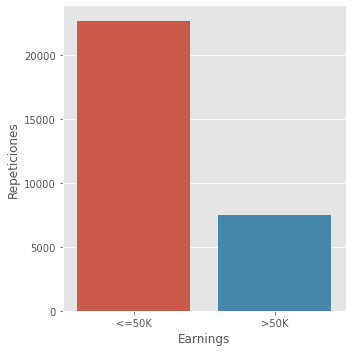

In [17]:
grafica = sb.catplot(x = 'earnings',data = adultosCambio,kind = "count")
grafica.set_xticklabels(["<=50K", ">50K"])
grafica.set_axis_labels("Earnings", "Repeticiones")
grafica

<p> Gracias al barplot se puede notar que existe una mayor cantidad de datos que son menores a 50.000 dolares a los que son mayores </p>

# Distribución variable objetivo con las demás variables

In [18]:
# Recordemos las variables que contiene:
adultosCambio.columns

Index(['age', 'workclass', 'education', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'earnings'],
      dtype='object')

Agrupaciones de edad según las ganancias


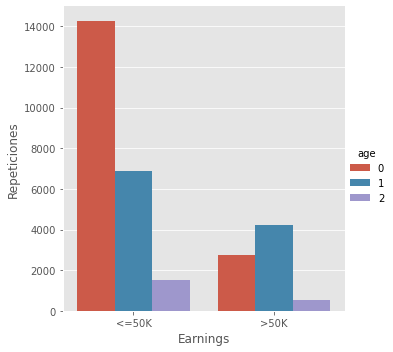

In [19]:
print("Agrupaciones de edad según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'age',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   La mayoría de personas jóvenes (entre 17 y 39 años) tienen ganancias menores o iguales a los 50K

*   Existe una distribución proporcional de las personas entre los 40 y los 59 años que ganan <=50K y que ganan >50K

*   Son pocas las personas de 60 años o más que tienen ganancias, ya sean menores o iguales o mayores a 50K

Agrupaciones de workclass según las ganancias


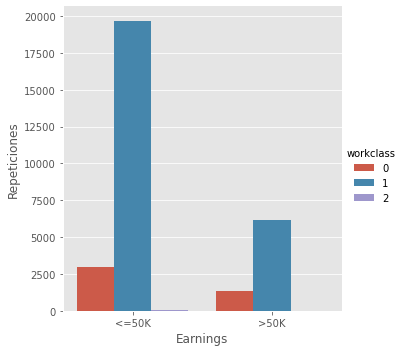

In [20]:
print("Agrupaciones de workclass según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'workclass',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   La mayoría de las personas son trabajadores privados que ganan <=50K

*   Son muy pocas las personas desempleadas que alcanzan a ganar una cantidad menor o igual a los 50K

Agrupaciones de educación según las ganancias


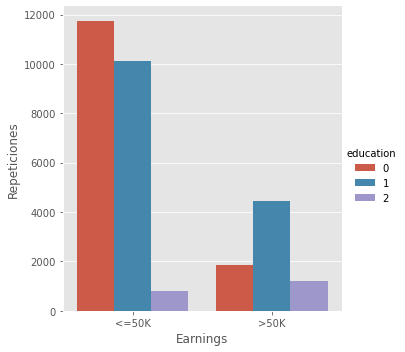

In [21]:
print("Agrupaciones de educación según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'education',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   Son muchas personas que tiene educación básica y que tienen ganancias de <=50K, así como también son muchas que tienen algún tipo de certificación y que tienen ganancias de <=50K
*   Son muy pocas las personas que tienen educación avanzada y que tienen alguna ganancia

Agrupaciones de tipo de relación según las ganancias


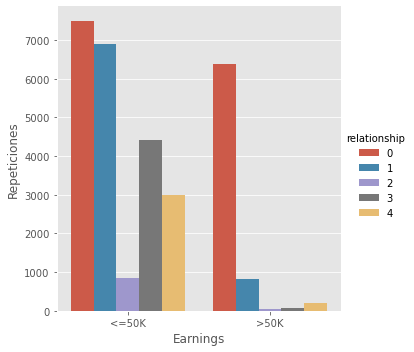

In [22]:
print("Agrupaciones de tipo de relación según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'relationship',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   Gran cantidad de personas con relationship 0 tienen ganancias de cualquier valor
*   Son muy pocas las personas de relationship 2,3 y 4 que tienen ganacias mayores a los 50K

Agrupaciones de etnia según las ganancias


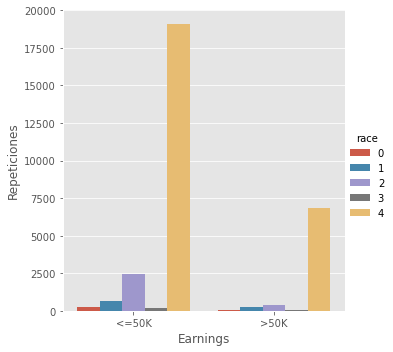

In [23]:
print("Agrupaciones de etnia según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'race',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   La mayoría de las personas de etnia 4 tienen ganancias de cualquier valor.
*   En el caso de las demás etnias, son pocos los que tienen algún tipo de ganancia

Agrupaciones de sexo según las ganancias


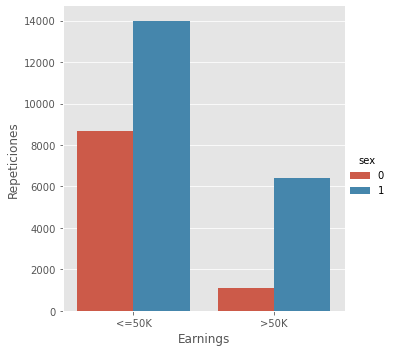

In [24]:
print("Agrupaciones de sexo según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'sex',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   Se evidencia que en ambos casos (<=50K y >50K) son más los hombres que las mujeres

Agrupaciones de ganancias de capital según las ganancias


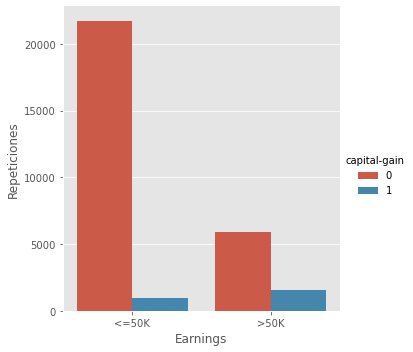

In [25]:
print("Agrupaciones de ganancias de capital según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'capital-gain',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   En capital-gain 0 se encuentra la mayoría de las personas, tanto las que tiene ganancias de <=50K como las que tienen >50K

Agrupaciones de perdidas de capital según las ganancias


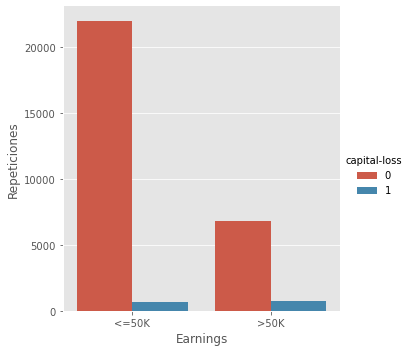

In [26]:
print("Agrupaciones de perdidas de capital según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'capital-loss',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   En capital-loss 0 se encuentra la mayoría de las personas, tanto las que tiene ganancias de <=50K como las que tienen >50K

Agrupaciones de horas trabajadas por semanas según las ganancias


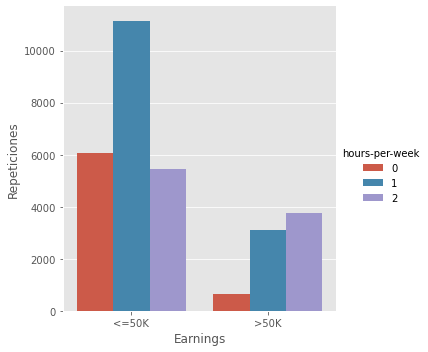

In [27]:
# hours-per-week', 'native-country'
print("Agrupaciones de horas trabajadas por semanas según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'hours-per-week',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   En el caso de los que tienen <=50K de ganancias, son más los que trabajan 40 horas a la semana
*   En el caso de los que tienen >50K de ganancias, son más los que trabajan 40 horas o más a la semana

Agrupaciones de países según las ganancias


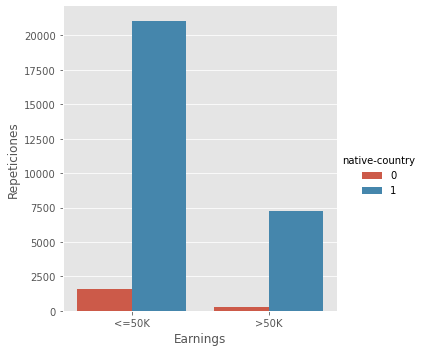

In [28]:
# hours-per-week', 'native-country'
print("Agrupaciones de países según las ganancias")
graficaEdad = sb.catplot(x = 'earnings',data = adultosCambio, hue= 'native-country',kind = 'count')
graficaEdad.set_xticklabels(["<=50K", ">50K"])
graficaEdad.set_axis_labels("Earnings", "Repeticiones")
graficaEdad

*   Son pocas las personas que siendo de países en desarrollo tienen alguna ganancia
*   Muchas personas que son de países de primer mundo tienen algún tipo de ganancia sobre todo aquellas que ganan <=50K

# 4. Selección de variables para la clasificación

## Gráfica de correlación de Pearson

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

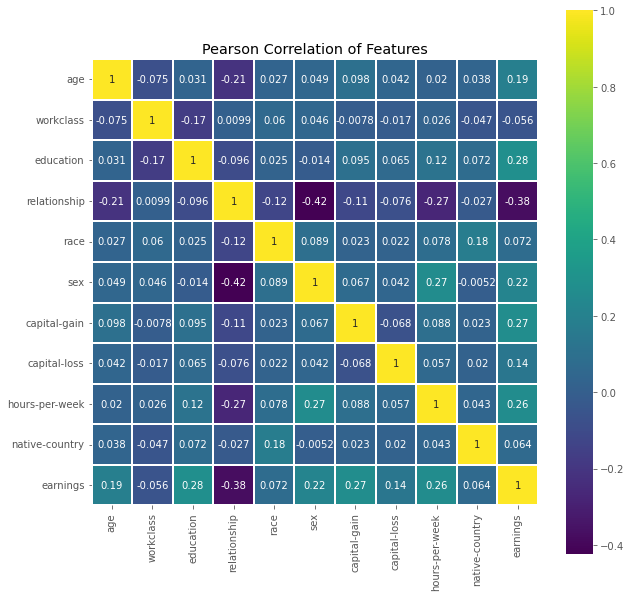

In [30]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features')
sb.heatmap(adultosCambio.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

## SelectKBest

In [31]:
# Mezclar los datos
adultosCambio=adultosCambio.sample(frac=1).reset_index(drop=True)
#Todos los datos excepto la caracteristica objetivo.
X = adultosCambio.drop(['earnings'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = adultosCambio['earnings']
 
best=SelectKBest(k=10)

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['age', 'workclass', 'education', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


<p> SelectKBest y la gráfica de correlación de Pearson tienen el mismo punto de seleccionar todas las variables, pero la excepción está en Pearson para seleccionar relationship. Relationship tiene un gran indice de correlación, lo que nos obliga a eliminar esta variable de nuestra clasificación. </p> 
<p> Al final se seleccionaron: </p>
<ul>
    <li>Age</li>
    <li>Workclass</li>
    <li>Education</li>
    <li>Race</li>
    <li>Sex</li>
    <li>Capital-gain</li>
    <li>Capital-loss</li>
    <li>Hours-Per-Week</li>
    <li>Native-Country</li>
</ul>

In [32]:
# Eliminación de relationship
adultosCambio = adultosCambio.drop(['relationship'],axis = 1)

# 2. Árbol de decisión: Gini y entropía

In [33]:
X = adultosCambio.drop(['earnings'], axis=1)

#CARACTERÍSTICA OBJETIVO
y = adultosCambio['earnings']
X = np.array(X)
y = np.array(y)

### Entropy

In [34]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # Numero de "folds: Subconjuntos" en que se dividen los datos de entrenamiento,
                                                                # Lo prueba con n-1 holds restantnes,
accuracies = list()
max_attributes = len(list(adultosCambio))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={0:1, 1:3.5}) # Por defecto todas las clases tienen peso 1
                                                                        # tambien se puede usar 'balanced'
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]    #Validación cruzada.
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.577083
         2          0.702973
         3          0.635984
         4          0.674633
         5          0.675329
         6          0.716464
         7          0.721138
         8          0.718287
         9          0.725546
        10          0.726574


### Gini

In [35]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) # Numero de "folds: Subconjuntos" en que se dividen los datos de entrenamiento,
                                                                # Lo prueba con n-1 holds restantnes,
accuracies = list()
max_attributes = len(list(adultosCambio))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={0:1, 1:3.5}) # Por defecto todas las clases tienen peso 1
                                                                        # tambien se puede usar 'balanced'
    for train_index, valid_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[valid_index]    #Validación cruzada.
        y_train, y_test = y[train_index], y[valid_index]

        model = tree_model.fit(X_train, y_train)
        valid_acc = model.score(X_test, y_test) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    # almacenamos acc promedio para cada profundidad
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.577083
         2          0.702112
         3          0.645497
         4          0.669628
         5          0.673805
         6          0.717525
         7          0.721801
         8          0.718851
         9          0.724685
        10          0.726209


<p>Lo primero que hay que notar es que las exactitudes son demasiado similares entre Gini y entropi, siendo la diferencia solo de unos pocos decimales. En este caso particular se selecciona es por el cómo converge de forma más rápida la exactitud en gini que en entropy (pero realmente la diferencia entre estos dos es mínima). Otro dato: la característica del nodo raíz y sus hijos se basó en el SelectKBest, el cual mostró el ordén de relevancia de todas las caracteristicas. </p>

# 3. Datos de entrenamiento y prueba

In [36]:
X = adultosCambio.drop(['earnings'],axis=1)
y = adultosCambio['earnings']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,    
                                                    stratify = y,
                                                    random_state = 1)


<p>Se aprovecha que existe una gran cantidad de datos en el dataset original, ocasionando que no haya problema a la hora de asignar el 80% de los datos al entrenamiento, puesto igualmente el 20% de prueba sigue siendo una gran recopilación de datos </p>

# 5. Árbol de decisión

In [37]:
# Probar el árbol con diferentes alturas, min_samples_split y min_samples_leaf
# Se van a crear 5 listas: min_samples_split, min_samples_leaf, max_depth, acc_train y acc_test
minimoSplit = []
minimoLeaf = []
profundidad = []
acTrain = []
acTest = []
for altura in range(1,len(list(adultosCambio))+1):
    for split in range(2,50):
        for leaf in range(2,50):
            minimoSplit.append(split)
            minimoLeaf.append(leaf)
            profundidad.append(altura)
            decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                                        min_samples_split=split, 
                                                        min_samples_leaf=leaf,   
                                                        max_depth = altura,   
                                                        class_weight='balanced')  #Balanceo automático
            # Ajustamos el modelo con los datos
            decision_tree.fit(X_train, y_train)

            #Cada cambio que se haga requiere analizar o tener en cuenta su nivel de exactitud.

            #Exactitud

            #Datos de entrenamiento
            y_pred_train = decision_tree.predict(X_train)

            #Porcentaje de exactitud con los datos de entrenamiento
            acc_train = accuracy_score(y_train, y_pred_train)
            acTrain.append(acc_train)
            #Datos de prueba
            y_pred_test = decision_tree.predict(X_test)

            #Porcentaje de exactitud con pruebas
            acc_test = accuracy_score(y_test, y_pred_test)
            acTest.append(acc_test)
arbolComparativa = pd.DataFrame({"Max Depth": profundidad, "Min Samples Split": minimoSplit, "Min Samples Leaf": minimoLeaf, "Acc Train":acTrain, "Acc Test":acTest})
arbolComparativa   

,Max Depth,Min Samples Split,Min Samples Leaf,Acc Train,Acc Test
0,1,2,2,0.578372,0.571926
1,1,2,3,0.578372,0.571926
2,1,2,4,0.578372,0.571926
3,1,2,5,0.578372,0.571926
4,1,2,6,0.578372,0.571926
...,...,...,...,...,...
23035,10,49,45,0.730019,0.722406
23036,10,49,46,0.730184,0.722406
23037,10,49,47,0.731096,0.723566
23038,10,49,48,0.731096,0.723566


<p> Ahora se va a determinar qué altura tiene la mejor accuracy test y accuracy train </p>

In [38]:
arbolComparativa.groupby('Max Depth')['Acc Test'].max()

Max Depth
1     0.571926
2     0.698542
3     0.631422
4     0.669042
5     0.666888
6     0.727047
7     0.723069
8     0.752900
9     0.756049
10    0.730196
Name: Acc Test, dtype: float64

<p> Se puede observar que por parte de la exactitud de los datos de testeo las mejores profundidades son 8 y 9, ahora falta determinar cual es la mejor especificamente. Se van a buscar la exactitud de los datos de prueba de los datos de testeo que salieron, para así determinar si hay alguna comparación. </p>


In [39]:
# Lo que hace es seleccionar solo las filas que tengan x altura, para que luego se organice de forma descendente el Acc Test
arbolComparativa.loc[arbolComparativa['Max Depth'] == 8].sort_values('Acc Test', ascending = False)

,Max Depth,Min Samples Split,Min Samples Leaf,Acc Train,Acc Test
17218,8,24,36,0.754050,0.752900
17413,8,28,39,0.754050,0.752900
16451,8,8,37,0.754050,0.752900
16450,8,8,36,0.754050,0.752900
16449,8,8,35,0.754050,0.752900
...,...,...,...,...,...
16704,8,14,2,0.753884,0.748426
17904,8,39,2,0.753802,0.748426
17808,8,37,2,0.753802,0.748426
17856,8,38,2,0.753802,0.748426


In [40]:
paramDecisionTree=arbolComparativa.loc[arbolComparativa['Max Depth'] == 9].sort_values('Acc Test', ascending = False)
paramDecisionTree

,Max Depth,Min Samples Split,Min Samples Leaf,Acc Train,Acc Test
19785,9,30,11,0.758193,0.756049
19881,9,32,11,0.758193,0.756049
19929,9,33,11,0.758193,0.756049
19833,9,31,11,0.758193,0.756049
19261,9,19,15,0.757738,0.755883
...,...,...,...,...,...
20257,9,40,3,0.757572,0.751243
20256,9,40,2,0.757738,0.751243
20160,9,38,2,0.757738,0.751243
20161,9,38,3,0.757572,0.751243


In [41]:
#Min_Samples_Split
minSam=paramDecisionTree.iloc[0,1]
print('Se seleccionó como Min_Samples_Split el valor de ', minSam)

Se seleccionó como Min_Samples_Split el valor de  30


In [42]:
#Min_Samples_Leaf
minLeaf=paramDecisionTree.iloc[0,2]
print('Se seleccionó como Min_Samples_Leaf el valor de ', minLeaf)

Se seleccionó como Min_Samples_Leaf el valor de  11


<p> Seleccionamos la primera fila de los dos dataset de arribas, comparando el Acc Train notamos que el de profundidad 9 es mayor, es decir, vamos a seleccionar el árbol de decisión de altura 9. </p>

# 6. Segunda parte de árbol de decisión

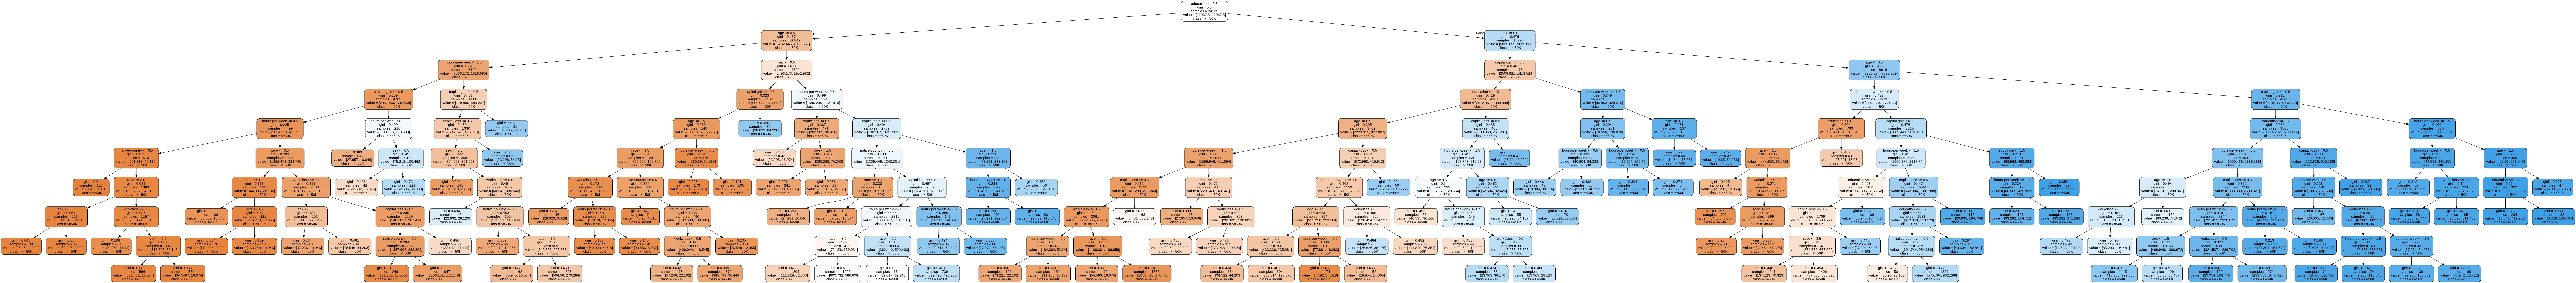

In [73]:
# Se escribe el árbol seleccionado
import pydot
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                                        min_samples_split=minSam, 
                                                        min_samples_leaf=minLeaf,   
                                                        max_depth = 9,   
                                                        class_weight='balanced')  #Balanceo automático
decision_tree.fit(X_train, y_train)
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 9,
                              impurity = True,
                              feature_names = list(adultosCambio.drop(['earnings'], axis=1)),
                              class_names = ['<=50K', '>=50K'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

<p>Para determinar la cantidad mínima de muestras por nodo y el mínimo de muestras se realizaron varias iteraciones sobre diversas alturas, muestras por nodo y mínimo de muestras, esto con el objetivo de buscar el árbol que tuviera la mejor exactitud. Todo el proceso se encuentra en el punto 5, en donde se ven los diferentes valores con sus exactitudes correspondientes. El balanceo de la clase se hizo de forma automatica</p>



# 7. Matriz de confusión



### Datos de entrenamiento



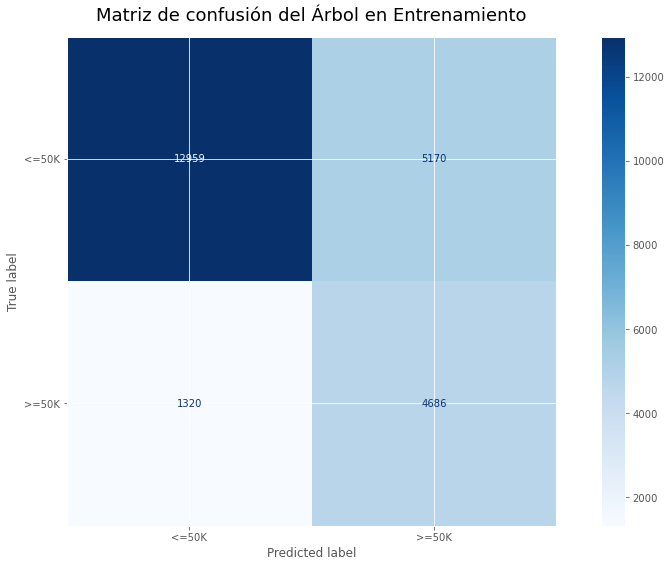

In [43]:
#Matriz de confuncion para Test
disp = plot_confusion_matrix(decision_tree, X_train, y_train,
                                 display_labels=['<=50K','>=50K'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Entrenamiento', y=1.02, size=18)

plt.show()

<p>La explicación es sencilla. El label de abajo se refiere al valor que predijo el árbol, mientras que el label lateral izquierdo se refiere al verdadero valor. Según estos resultados podemos decir que se predijo el valor correspondiente la mayoría de veces, siendo una pequeña proporción los valores mal etiquetados</p>



### Datos de prueba

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


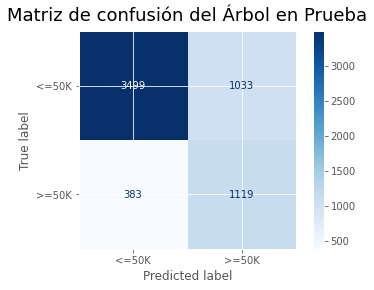

In [80]:
disp = plot_confusion_matrix(decision_tree, X_test, y_test,
                                 display_labels=['<=50K','>=50K'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Prueba', y=1.02, size=18)

plt.show()

<p>La explicación es sencilla. El label de abajo se refiere al valor que predijo el árbol, mientras que el label lateral izquierdo se refiere al verdadero valor. Según estos resultados podemos decir que se predijo el valor correspondiente la mayoría de veces, siendo una pequeña proporción los valores mal etiquetados</p>


# 8. Exactitud del árbol

### Exactitud del árbol con datos de entrenamiento

In [82]:
y_pred_train = decision_tree.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print("Train set accuracy: {:.2f}".format(acc_train))

Train set accuracy: 0.76


### Exactitud del árbol con datos de prueba

In [83]:
y_pred_test = decision_tree.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print("Test set accuracy: {:.2f}".format(acc_test))

Test set accuracy: 0.77


# 9. F1-Score, precision, recall

### Datos de entrenamiento

In [38]:
decoded_y_test = y_train
decoded_predictions = decision_tree.predict(X_train)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82     18129
           1       0.51      0.73      0.60      6006

    accuracy                           0.76     24135
   macro avg       0.70      0.75      0.71     24135
weighted avg       0.80      0.76      0.77     24135



### Datos de prueba

In [39]:
decoded_y_test = y_test
decoded_predictions = decision_tree.predict(X_test)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      4532
           1       0.51      0.75      0.61      1502

    accuracy                           0.76      6034
   macro avg       0.71      0.76      0.72      6034
weighted avg       0.80      0.76      0.77      6034



# 10. Clasificación Baseyiana

<p> Ya anteriormente se realizó el procesamiento, entonces no es necesario realizar más acciones sobre los datos (los datos son independientes entre sí)

In [84]:
# Definición del modelo
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train,
    y_train
)
y_pred = gnb.predict(X_test)
print('Precisión de los datos de entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Precisión de los datos de prueba {:.2f}'
     .format(gnb.score(X_test, y_test)))

Precisión de los datos de entrenamiento: 0.78
Precisión de los datos de prueba 0.79


# Matriz de confusión

### Datos de entrenamiento

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


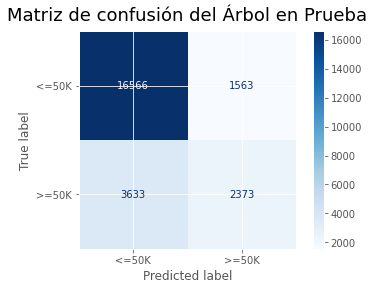

In [85]:
#Matriz de confuncipon para Test
disp = plot_confusion_matrix(gnb, X_train, y_train,
                                 display_labels=['<=50K','>=50K'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Prueba', y=1.02, size=18)

plt.show()

### Datos de prueba

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


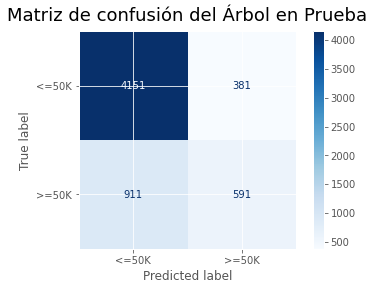

In [86]:
#Matriz de confuncipon para Test
disp = plot_confusion_matrix(gnb, X_test, y_test,
                                 display_labels=['<=50K','>=50K'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol en Prueba', y=1.02, size=18)

plt.show()

### Exactitud

### Con datos de entrenamiento

In [87]:
y_pred_train = gnb.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
print("Train set accuracy: {:.2f}".format(acc_train))

Train set accuracy: 0.78


### Con datos de prueba

In [88]:
y_pred_test = gnb.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print("Test set accuracy: {:.2f}".format(acc_test))

Test set accuracy: 0.79


<p>Lo más impresionante de todo esto es que la diferencia en la métrica de exactitud es mínima. El cambio es apenas de 0.01 a 0.02, lo cual nos hace concluir que no existe gran diferencia entre estos dos modelos en este caso especifico en la métrica de exactitud. </p>

# F1-Score, precision, recall

### Datos de entrenamiento

In [89]:
decoded_y_test = y_train
decoded_predictions = gnb.predict(X_train)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     18129
           1       0.60      0.40      0.48      6006

    accuracy                           0.78     24135
   macro avg       0.71      0.65      0.67     24135
weighted avg       0.77      0.78      0.77     24135



### Datos de prueba

In [90]:
decoded_y_test = y_test
decoded_predictions = gnb.predict(X_test)
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4532
           1       0.61      0.39      0.48      1502

    accuracy                           0.79      6034
   macro avg       0.71      0.65      0.67      6034
weighted avg       0.77      0.79      0.77      6034



# 11. Análisis y conclusiones

*   Al variar de manera manual los parámetros del Clasificador del Árbol de Decisión podría estarse descartando la respuesta óptima que se necesita, por lo que si se requiere un resultado más preciso, lo ideal es implementar un algoritmo como se hizo en la sección 5 (utilizando anidación de ciclos), sólo que el costo de hacerlo se ve reflejado en el tiempo de ejecución del mismo, pues estaríamos hablando de una complejidad alta O(n^3).
*   Al correr el modelo diseñado varias veces y hacer una comparación entre los resultados obtenidos, se puede evidenciar la presencia de diferencias de orden sutil. No obstante, es importante mencionar que estas pueden deberse al funcionamiento de los algoritmos de Clasificación implementados.
*   Para este caso se tuvo que el Clasificador Bayesiano obtuvo un mejor y ligero valor de exactitud comparado con el Clasificador del Árbol de Decisión. No obstante, puede presentarse de que las diferencias sean distintas con la implementación en otros casos, debido a, como se dijo en la anterior conclusión, el funcionamiento de dichos algoritmos.

